In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

Reading Data from csv

In [8]:
data = pd.read_csv('cardio_data_processed.csv')
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [9]:
df.shape

(68205, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [11]:
col_to_remove = ['age','bp_category_encoded','id']
df.drop(col_to_remove,axis = 1 , inplace = True)

Data Preprocessing

In [12]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [13]:
df.shape

(68205, 14)

In [15]:
# Numerical = []
# Categoricaal = []

# for col in df:
#    if df[col].dtype != 'o':
#         Numerical.append(col)
#    else:
#         Categorical.append(col)

Categorical = ['gender','cholesterol','glus','smoke',
               'aloc','active','cardio','bp_category' ]

Numerical = [col for col in df.columns if col not in Categorical]

In [16]:
df[Numerical]

,height,weight,ap_hi,ap_lo,gluc,alco,age_years,bmi
0,168,62.0,110,80,1,0,50,21.967120
1,156,85.0,140,90,1,0,55,34.927679
2,165,64.0,130,70,1,0,51,23.507805
3,169,82.0,150,100,1,0,48,28.710479
4,156,56.0,100,60,1,0,47,23.011177
...,...,...,...,...,...,...,...,...
68200,168,76.0,120,80,1,0,52,26.927438
68201,158,126.0,140,90,2,0,61,50.472681
68202,183,105.0,180,90,1,1,52,31.353579
68203,163,72.0,135,80,2,0,61,27.099251


In [17]:
corr = df[Numerical].corr()

<Axes: >

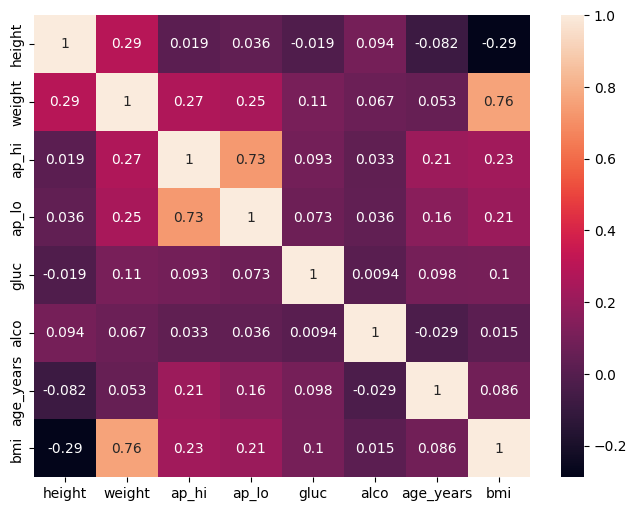

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(corr , annot = True)

In [19]:
Numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'alco', 'age_years', 'bmi']

In [20]:
Categorical

['gender',
 'cholesterol',
 'glus',
 'smoke',
 'aloc',
 'active',
 'cardio',
 'bp_category']

In [21]:
df.head()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [22]:
x = df.drop('bp_category', axis=1)
y = df['bp_category']

In [23]:
x

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
68201,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
68202,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


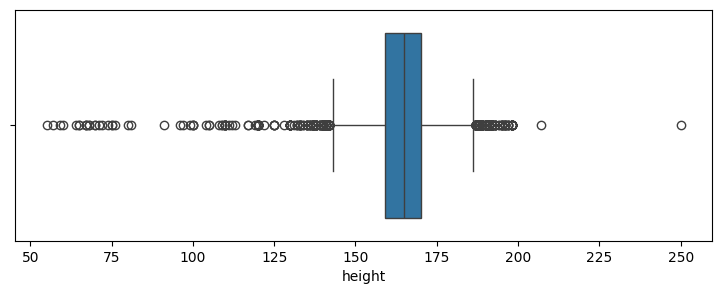

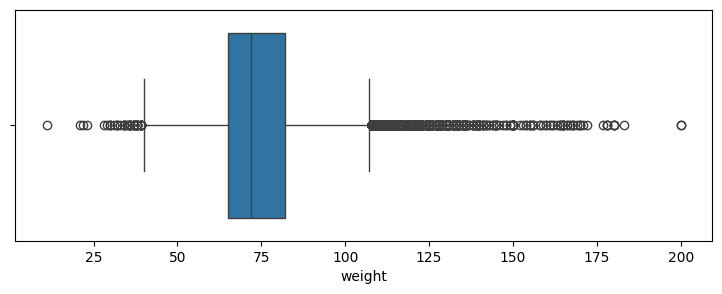

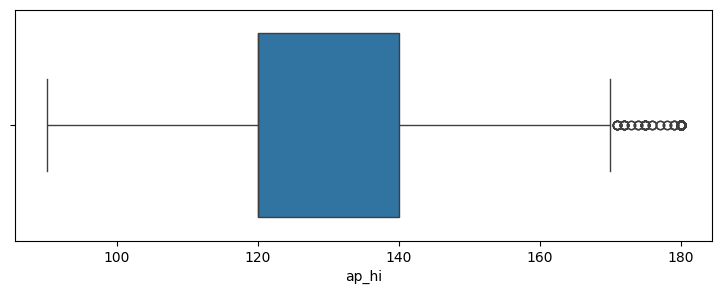

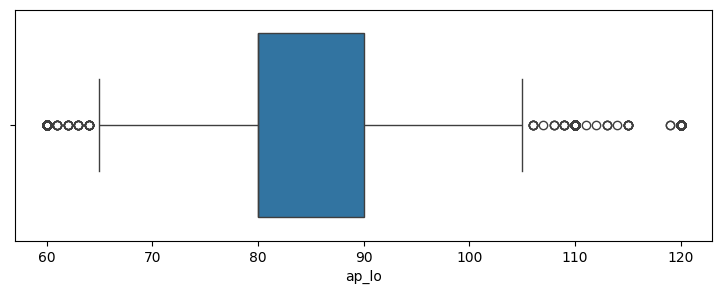

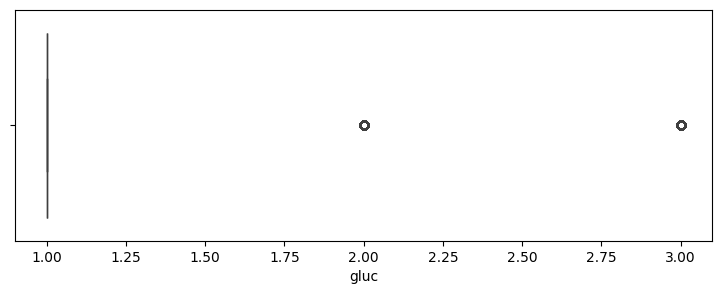

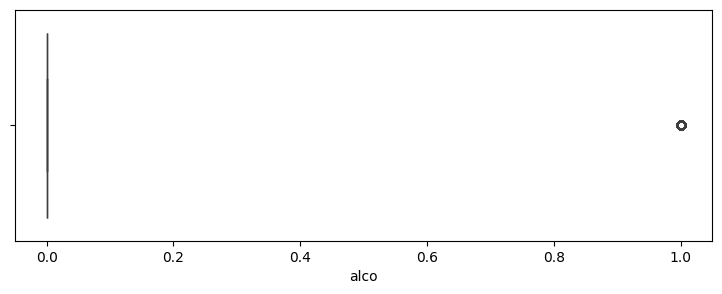

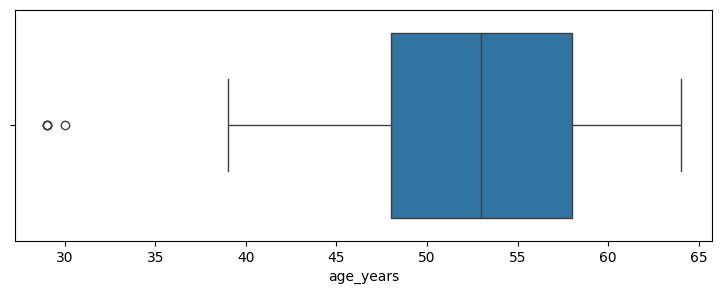

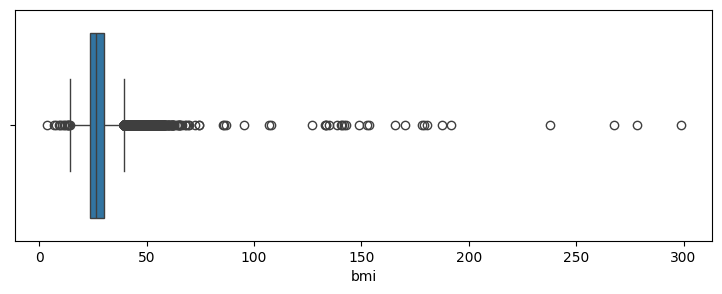

In [24]:
for col in Numerical:
    plt.figure(figsize=(9,3))
    sns.boxplot(df , x = col)

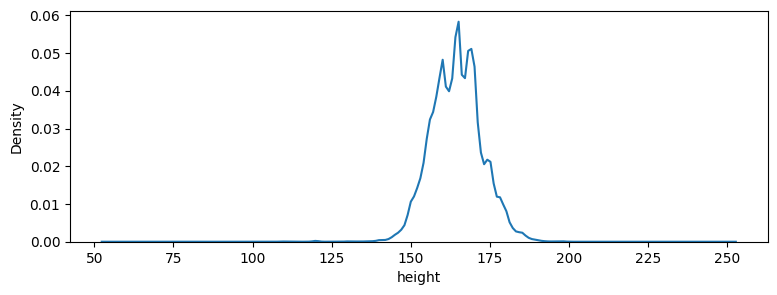

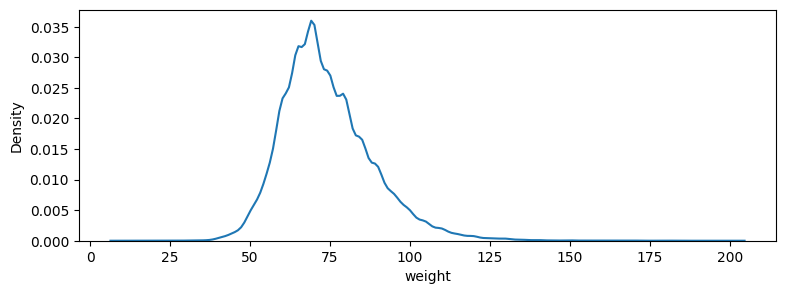

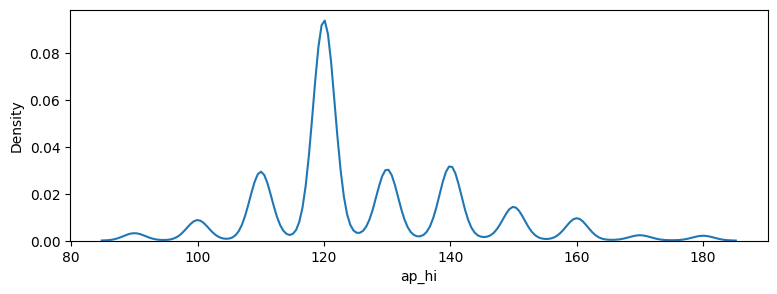

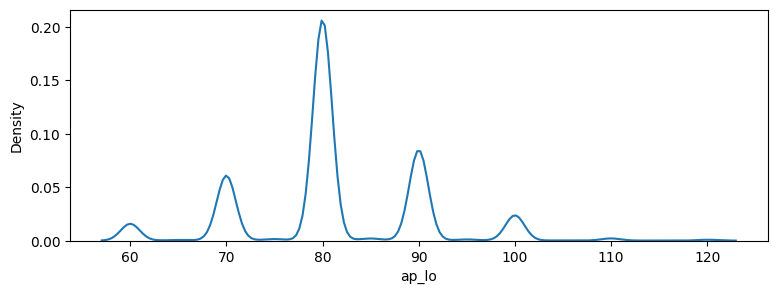

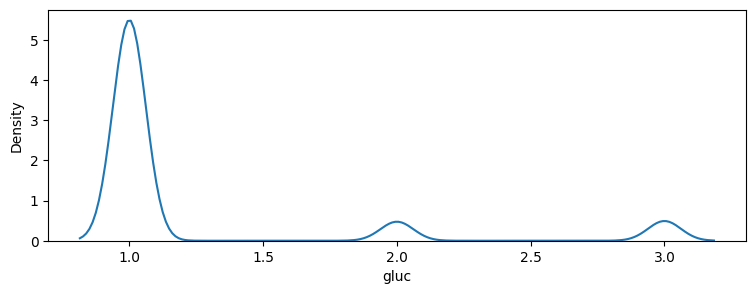

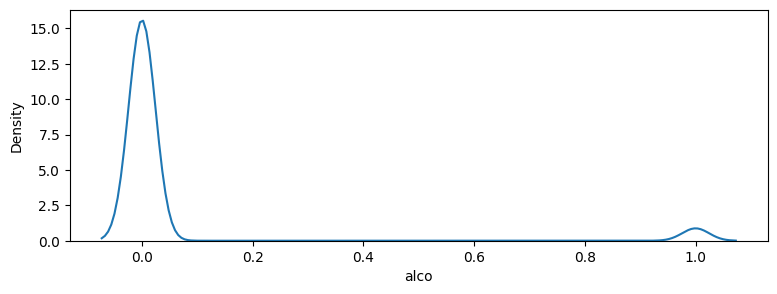

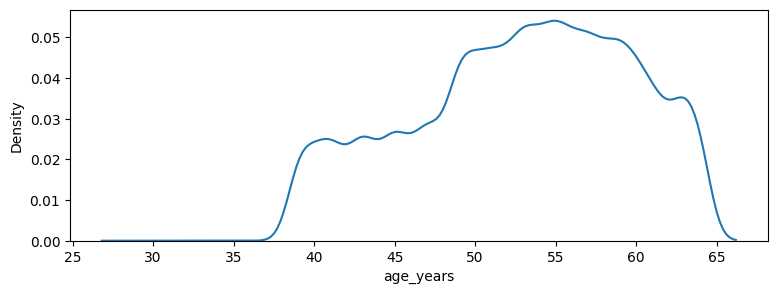

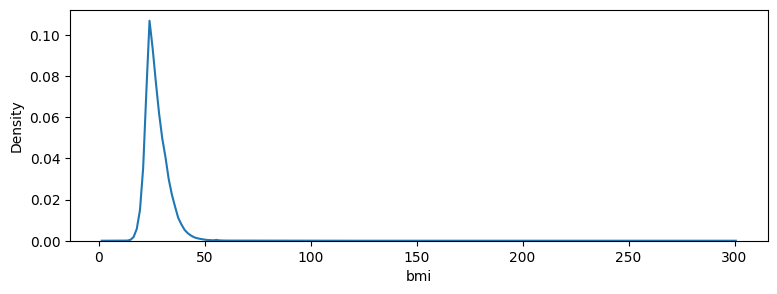

In [25]:
for col in Numerical:
    plt.figure(figsize =(9,3))
    sns.kdeplot(df , x = col)

<Axes: xlabel='height'>

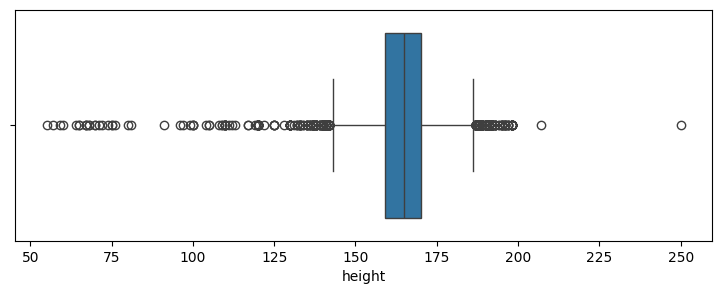

In [27]:
plt.figure(figsize=(9,3))
sns.boxplot(df,x = 'height')

In [28]:
# Handling Outliers
# IQR METHOD

per25 = np.quantile(df['height'],0.25)
per75 = np.quantile(df['height'],0.75)

IQR = per75 - per25

upper_value = per75 + 1.5 * IQR 
lower_value = per25 - 1.5 * IQR 

print("UPPER_BOUND = ", upper_value)
print("LOWER_BOUND = ", lower_value)

UPPER_BOUND =  186.5
LOWER_BOUND =  142.5


In [29]:
Outliers = df[(df['height'] > upper_value) & (df['height'] > lower_value)]
Outliers.shape

(259, 14)

(243, 14)


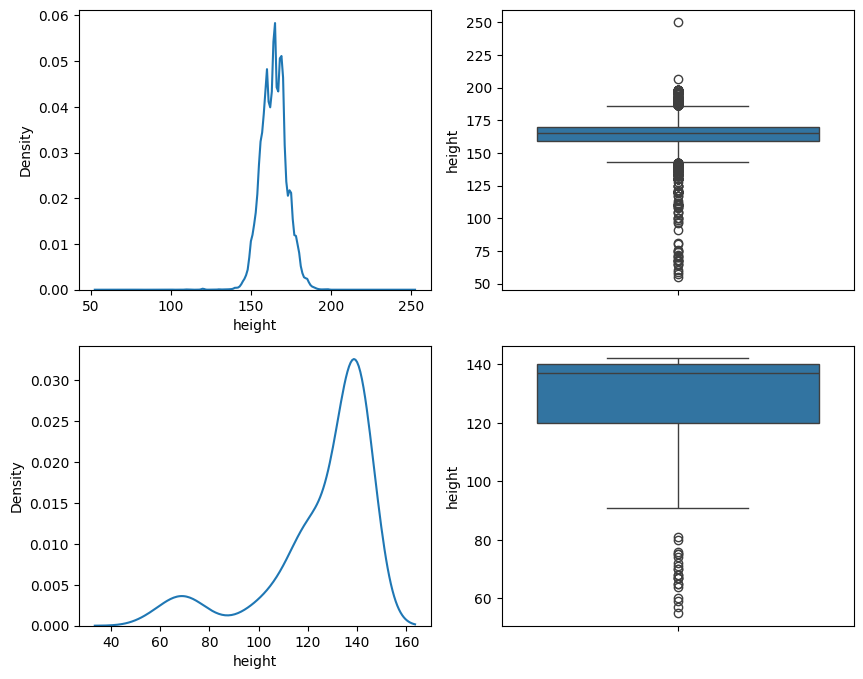

In [30]:
# df['height'] = np.where(
#     df['height']> upper_value,
#     upper_value,
#     np.where(
#         df['height'] < lower_value,
#         lower_value,
#        df['height']
#     )                       
#  )

trim_df = df[(df['height'] <= lower_value)]
print(trim_df.shape)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.kdeplot(df['height'])

plt.subplot(2,2,2)
sns.boxplot(df['height'])

plt.subplot(2,2,3)
sns.kdeplot(trim_df['height'])

plt.subplot(2,2,4)
sns.boxplot(trim_df['height'])
plt.show()

<Axes: xlabel='height'>

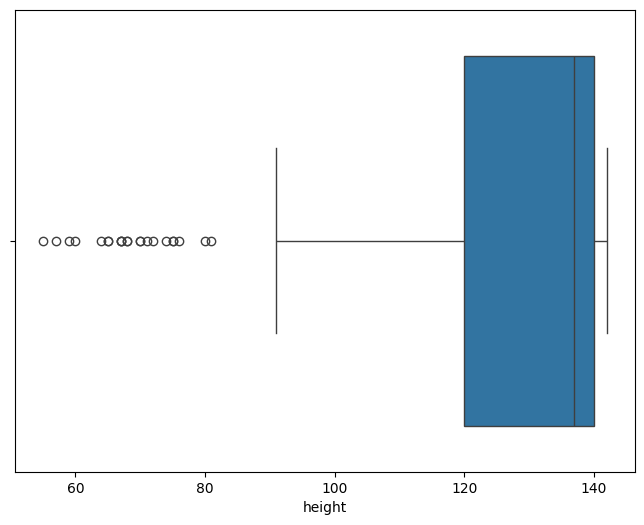

In [31]:
plt.figure(figsize=(8,6))

sns.boxplot(trim_df,x = 'height')

In [32]:
# plt.figure(figsize=(10,8))
# plt.subplot(2,2,1)
# sns.kdeplot(data['height'])

# plt.subplot(2,2,2)
# sns.boxplot(data['height'])

# plt.subplot(2,2,3)
# sns.kdeplot(df['height'])

# plt.subplot(2,2,4)
# sns.boxplot(df['height'])

# plt.show()


<Axes: xlabel='bmi'>

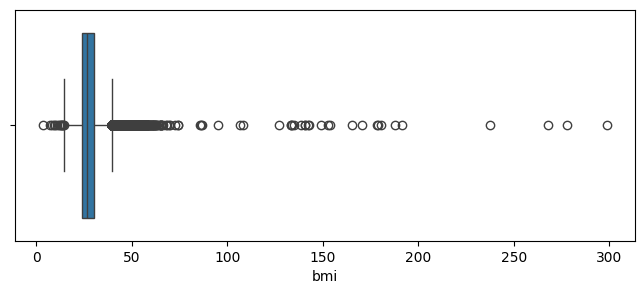

In [34]:
plt.figure(figsize=(8,3))
sns.boxplot(df, x = 'bmi')

In [35]:
# BMI
per25 = np.quantile(df['bmi'],0.25)
per75 = np.quantile(df['bmi'],0.75)

IQR = per75 - per25

upp_value = per75 + 1.5 * IQR
low_value = per25 - 1.5 * IQR

print("UPPER_BOUND = ", upp_value)
print("LOWER_BOUND = ", low_value)

UPPER_BOUND =  39.47786070351006
LOWER_BOUND =  14.513467232623075


(1975, 14)


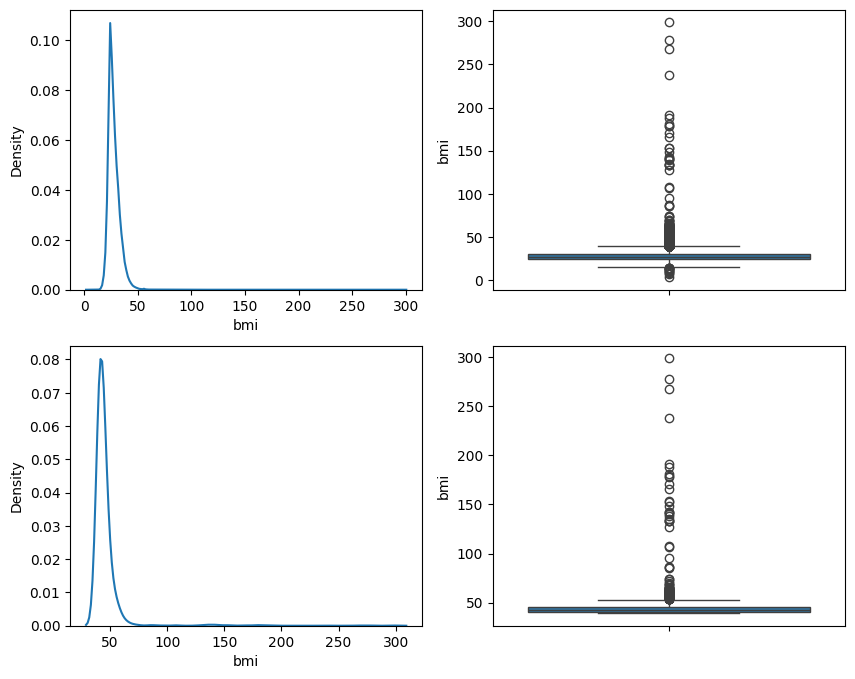

In [36]:
trims_df = df[(df['bmi'] >= upp_value)]
print(trims_df.shape)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.kdeplot(df['bmi'])

plt.subplot(2,2,2)
sns.boxplot(df['bmi'])

plt.subplot(2,2,3)
sns.kdeplot(trims_df['bmi'])

plt.subplot(2,2,4)
sns.boxplot(trims_df['bmi'])
plt.show()

<Axes: xlabel='bmi'>

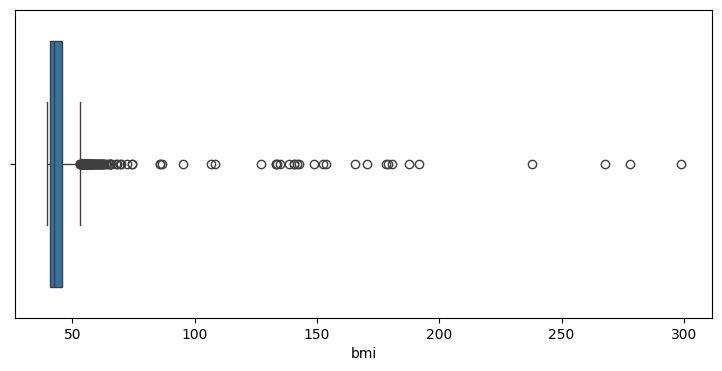

In [37]:
plt.figure(figsize=(9,4))
sns.boxplot(trims_df , x = 'bmi')

In [38]:
# BMI
per25 = np.quantile(df['weight'],0.25)
per75 = np.quantile(df['weight'],0.75)

IQR = per75 - per25

Upp_value = per75 + 1.5 * IQR
Low_value = per25 - 1.5 * IQR

print("UPPER_BOUND = ", Upp_value)
print("LOWER_BOUND = ", Low_value)

UPPER_BOUND =  107.5
LOWER_BOUND =  39.5


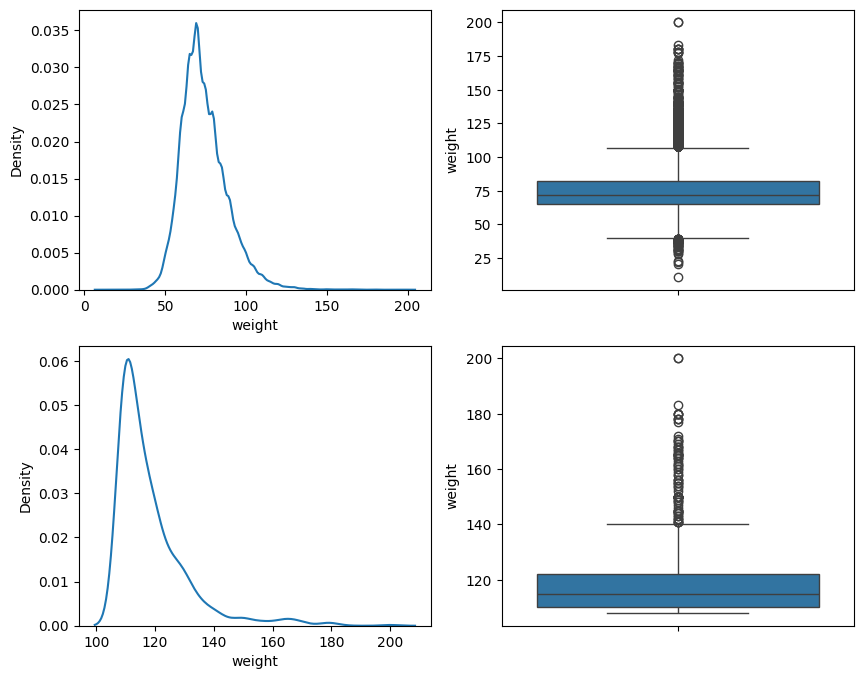

In [39]:
# Weight
weight_df = df[(df['weight']  >= Upp_value)]

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.kdeplot(df['weight'])

plt.subplot(2,2,2)
sns.boxplot(df['weight'])

plt.subplot(2,2,3)
sns.kdeplot(weight_df['weight'])

plt.subplot(2,2,4)
sns.boxplot(weight_df['weight'])
plt.show()

<Axes: xlabel='weight'>

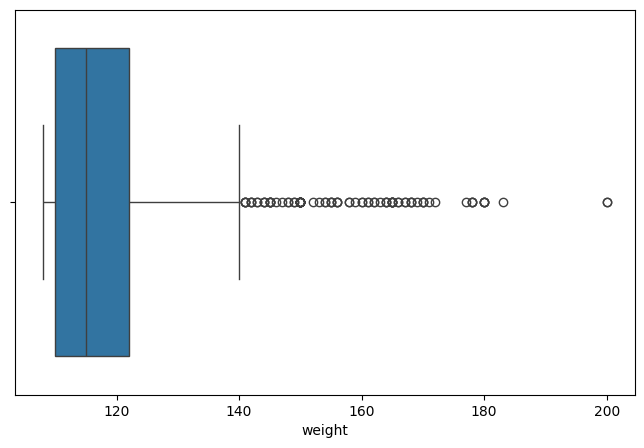

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(weight_df, x = 'weight')


<Axes: xlabel='ap_lo'>

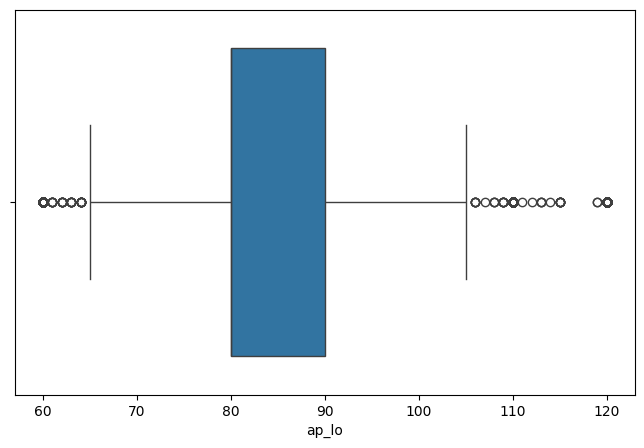

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(data, x = 'ap_lo')

In [43]:

# AP_LO
# BMI
per25 = np.quantile(df['ap_lo'],0.25)
per75 = np.quantile(df['ap_lo'],0.75)

IQR = per75 - per25

Upp_bound = per75 + 1.5 * IQR
Low_bound = per25 - 1.5 * IQR

print("UPPER_BOUND = ", Upp_bound)
print("LOWER_BOUND = ", Low_bound)

UPPER_BOUND =  105.0
LOWER_BOUND =  65.0


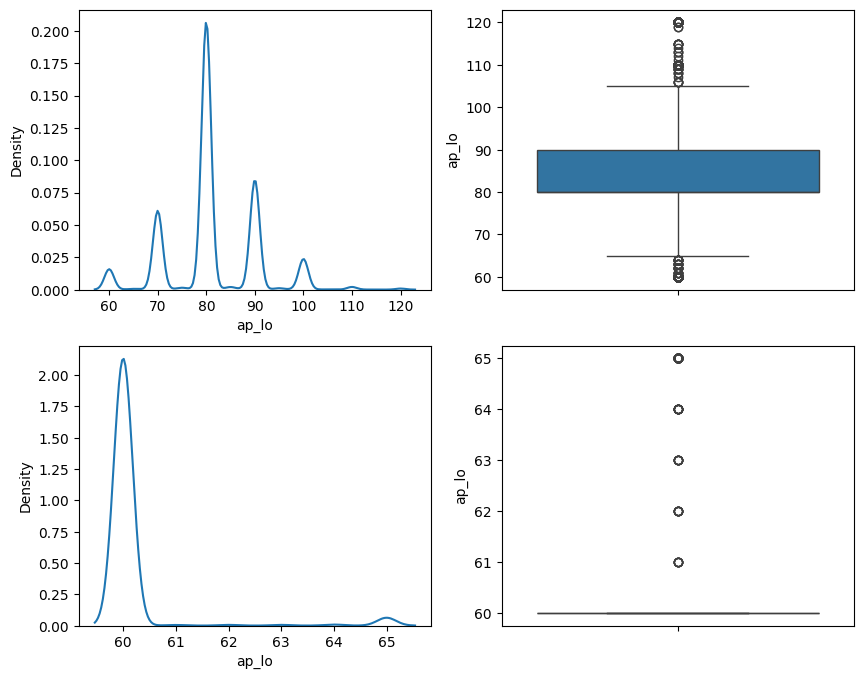

In [44]:
# AP_LO
ap_lo_df = df[(df['ap_lo']  <= Low_bound)]

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.kdeplot(df['ap_lo'])

plt.subplot(2,2,2)
sns.boxplot(df['ap_lo'])

plt.subplot(2,2,3)
sns.kdeplot(ap_lo_df['ap_lo'])

plt.subplot(2,2,4)
sns.boxplot(ap_lo_df['ap_lo'])
plt.show()

Scaling the numerical Columns 

In [49]:
Numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'alco', 'age_years', 'bmi']

In [50]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [51]:
x = df.drop('cardio',axis=1)
y = df['cardio']

In [52]:
x_train , x_test , y_train , y_test = train_test_split(x,y, train_size= 0.75)

In [56]:
CTE = ColumnTransformer(transformers=[
    ('robsc', RobustScaler(), Numerical),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['bp_category'])
], remainder='passthrough')

In [57]:
#cte = ColumnTransformer(transformers=[
 #   ('robsc',RobustScaler(),Numerical),
  #  ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['bp_category'])},
# remainder='passthrough')


In [58]:
CTE.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('robsc', RobustScaler(),
                                 ['height', 'weight', 'ap_hi', 'ap_lo', 'gluc',
                                  'alco', 'age_years', 'bmi']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['bp_category'])])>

In [59]:
X_train_transformerd = CTE.fit_transform(x_train)

In [60]:
X_test_transformerd = CTE.transform(x_test)

In [61]:
df_frame = pd.DataFrame(data = X_train_transformerd,columns =  CTE.get_feature_names_out())
df_frame

,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__gluc,robsc__alco,robsc__age_years,robsc__bmi,ohe__bp_category_Hypertension Stage 1,ohe__bp_category_Hypertension Stage 2,ohe__bp_category_Normal,remainder__gender,remainder__cholesterol,remainder__smoke,remainder__active
0,0.909091,1.352941,0.0,-1.0,0.0,0.0,-1.1,0.748893,0.0,0.0,0.0,2.0,1.0,0.0,1.0
1,0.090909,1.117647,0.0,0.0,0.0,0.0,0.1,1.069870,1.0,0.0,0.0,2.0,1.0,0.0,0.0
2,1.454545,2.647059,0.0,0.0,0.0,0.0,-1.0,1.500810,1.0,0.0,0.0,2.0,1.0,1.0,0.0
3,-0.272727,-0.470588,0.0,0.0,0.0,0.0,-1.1,-0.314042,1.0,0.0,0.0,1.0,2.0,0.0,1.0
4,0.909091,0.176471,-0.5,-1.0,0.0,0.0,-0.3,-0.297495,0.0,0.0,1.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,0.363636,-0.235294,1.5,1.0,0.0,0.0,1.1,-0.406628,0.0,1.0,0.0,1.0,2.0,0.0,1.0
51149,-0.545455,-0.647059,-1.0,-1.0,0.0,0.0,0.4,-0.355338,0.0,0.0,1.0,1.0,1.0,0.0,1.0
51150,-0.818182,-0.764706,0.0,-1.0,0.0,0.0,0.8,-0.336892,0.0,0.0,0.0,1.0,1.0,0.0,1.0
51151,-0.636364,-0.411765,0.0,0.0,0.0,0.0,0.3,-0.049511,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [62]:
Label_encoder = LabelEncoder()

In [56]:
# y_train_enc = enc.fit_transform(y_train)

# y_test_enc = enc.transform(y_test)

In [63]:
# Importing  Classification Model
from sklearn.linear_model import LogisticRegression


In [64]:
lr = LogisticRegression()


In [67]:
lr.fit(x_train_transformed, y_train)


NameError: name 'x_train_transformed' is not defined

In [58]:
y_train

42848    1
32188    0
26884    0
38389    0
36876    0
        ..
54654    0
21127    0
59129    1
62433    1
923      1
Name: cardio, Length: 51153, dtype: int64

In [59]:
X_test_transformerd.shape

(17052, 16)

In [60]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'robsc__bmi',
       'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active',
       'remainder__height_log'], dtype=object)

In [61]:
x_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category',
       'height_log'],
      dtype='object')

In [62]:
#x_train.columns >> ColumnTransformer >> predicition

Traning the Model

Decision Tree Classifier

RandomForest

Xgboost

In [63]:
from sklearn.metrics import accuracy_score , precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformerd,y_train)
pred = dtc.predict(X_test_transformerd)

In [65]:
pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [66]:
accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [67]:
print(accuracy)
print(recall)

0.6341778090546564
0.6189291637052831


In [68]:
cm

array([[5589, 3021],
       [3217, 5225]], dtype=int64)

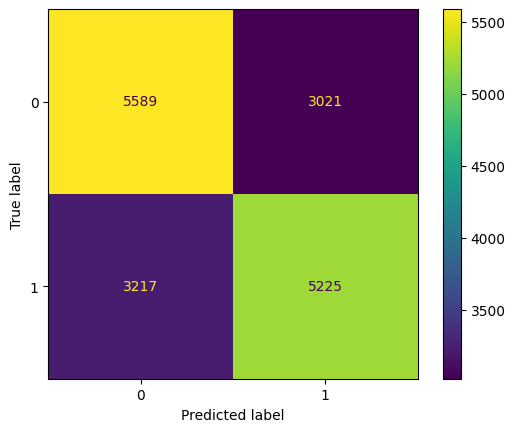

In [69]:
ConfusionMatrixDisplay(cm).plot()

In [70]:
 dtc2 = DecisionTreeClassifier(max_depth=5,criterion='entropy')

dtc2.fit(X_train_transformerd,y_train)
pred = dtc2.predict(X_test_transformerd)
accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [71]:
print(accuracy)
print(recall)

0.7241379310344828
0.6194029850746269


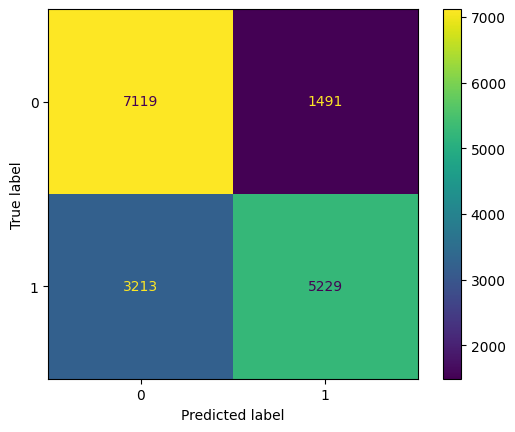

In [72]:
ConfusionMatrixDisplay(cm).plot()

Hypertunng Decision Tree

In [73]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [79]:
# param_dict = {
#               'criterion': ['gini','entropy']
#               'max_depth': [5,6,7],
#               'max_features': [7,8,9,10,12.15],
#               'min_samples_split': [8,10,12],
#               }

# randomcv = RandomizedSearchCV(dtc,param_distributions=param_dict)
# randomcv.fit(X_train_transformerd, y_train)

In [80]:
randomcv = RandomizedSearchCV(dtc,param_distributions=param_dict)


In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7],
    'max_features': [7, 8, 9, 10, 12, 15],
    'min_samples_split': [8, 10, 12],
}

dtc = DecisionTreeClassifier()  # Assuming dtc is your DecisionTreeClassifier object
randomcv = RandomizedSearchCV(dtc, param_distributions=param_dict)
randomcv.fit(X_train_transformerd, y_train)


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [83]:
randomcv.fit(X_train_transformerd,y_train)
rfc_predict = randomcv.predict(X_test_transformerd)

In [87]:
acc =  accuracy_score(rfc_predict,y_test)
recc =  recall_score(rfc_predict,y_test)
conf =  confusion_matrix(rfc_predict,y_test)



In [88]:
print(acc)
print(recc)
print(conf)

0.7241379310344828
0.7465699208443272
[[6689 2783]
 [1921 5659]]


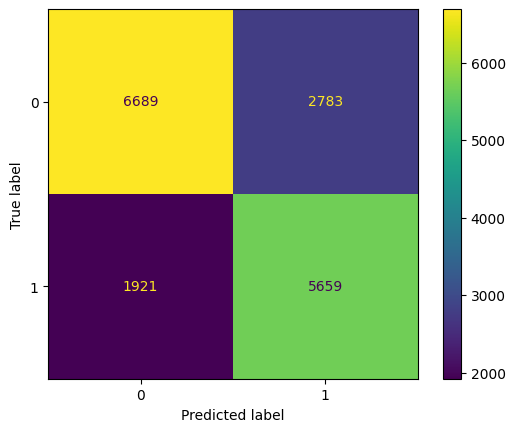

In [89]:
ConfusionMatrixDisplay(conf).plot()